In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sales_data_with_discounts.csv')
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [4]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [5]:
# Identify numerical columns in the dataset
df_num = df.select_dtypes(include='number')
df_num

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [6]:
# Calculate descriptive statistics
statistics = df_num.agg(['mean','median','min','max','std','skew','kurt']).T
statistics['mode'] = df_num.mode().iloc[0]
statistics

,mean,median,min,max,std,skew,kurt,mode
Volume,5.066667,4.000000,1.000000,31.000000,4.231602,2.731724,10.258547,3.000000
Avg Price,10453.433333,1450.000000,290.000000,60100.000000,18079.904840,1.908873,2.075655,400.000000
Total Sales Value,33812.835556,5700.000000,400.000000,196400.000000,50535.074173,1.534729,1.024916,24300.000000
Discount Rate (%),15.155242,16.577766,5.007822,19.992407,4.220602,-1.062294,-0.178541,5.007822
Discount Amount,3346.499424,988.933733,69.177942,25738.022194,4509.902963,1.913038,3.831186,69.177942
Net Sales Value,30466.336131,4677.788059,326.974801,179507.479049,46358.656624,1.540822,1.012468,326.974801


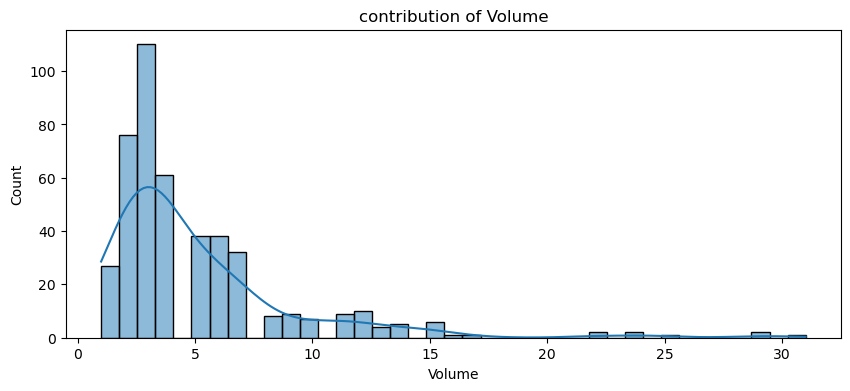

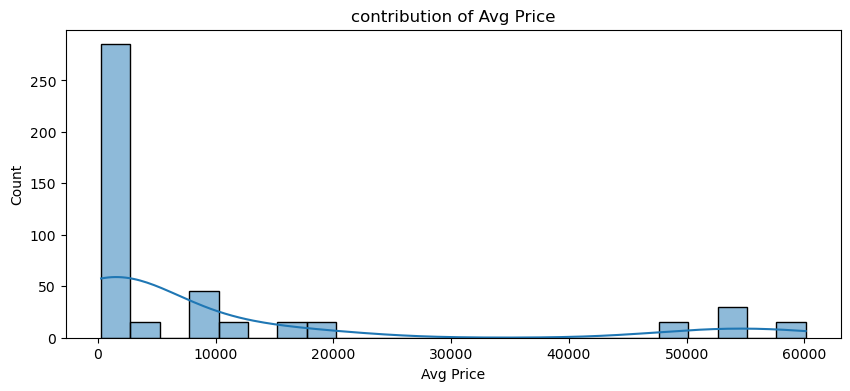

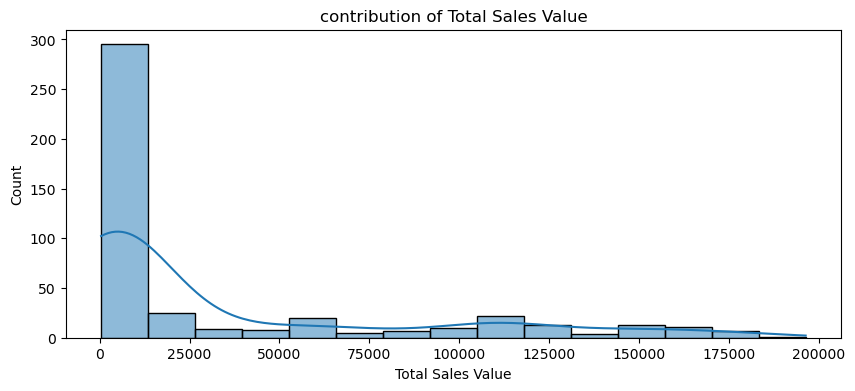

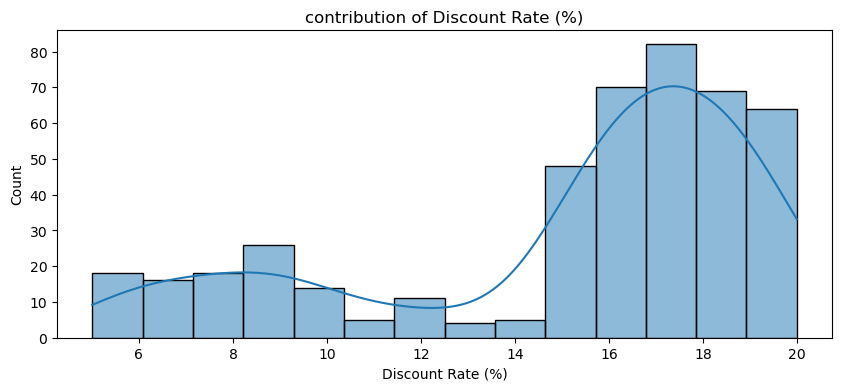

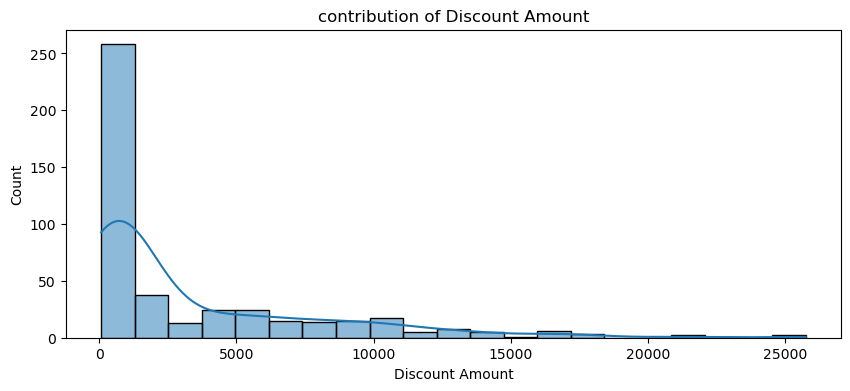

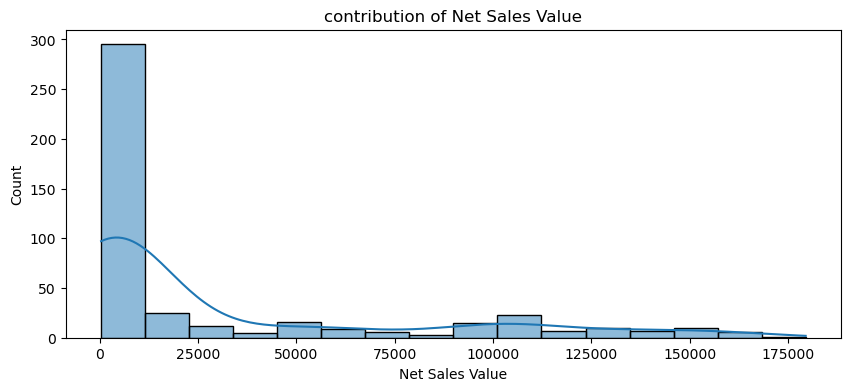

In [7]:
# Data Visualization using histogram
def plot_distribution (data,columns):
    for column in columns:
        plt.figure(figsize=(10,4))
        sns.histplot(data[column],kde= True)
        plt.title(f'contribution of {column}')
        plt.show()
plot_distribution(df,df_num)

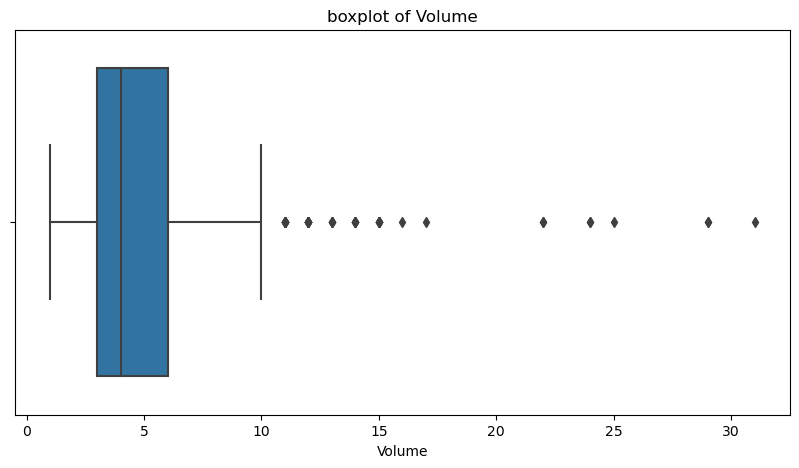

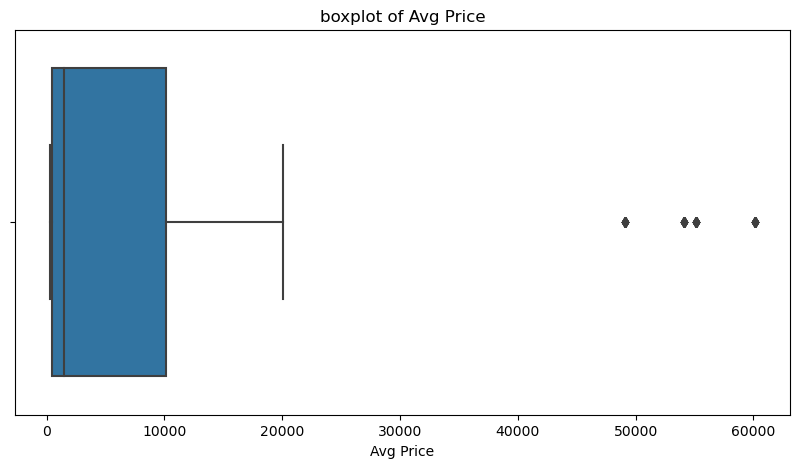

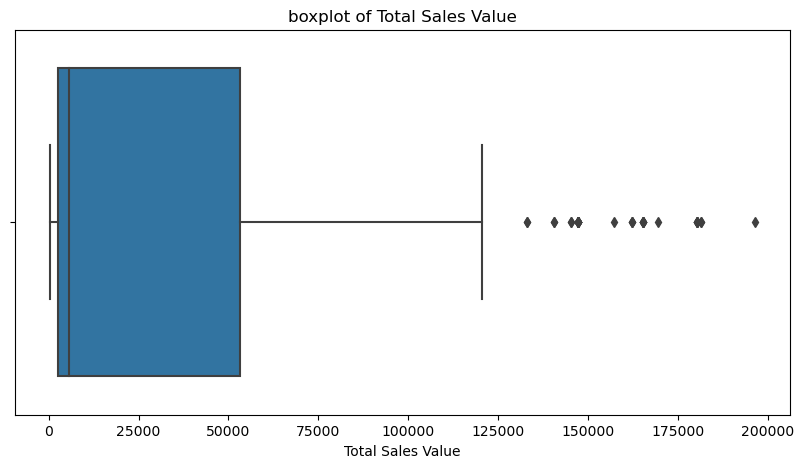

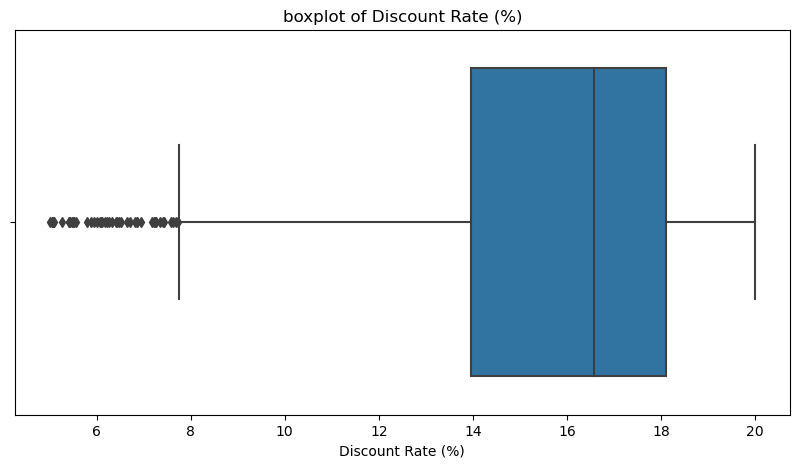

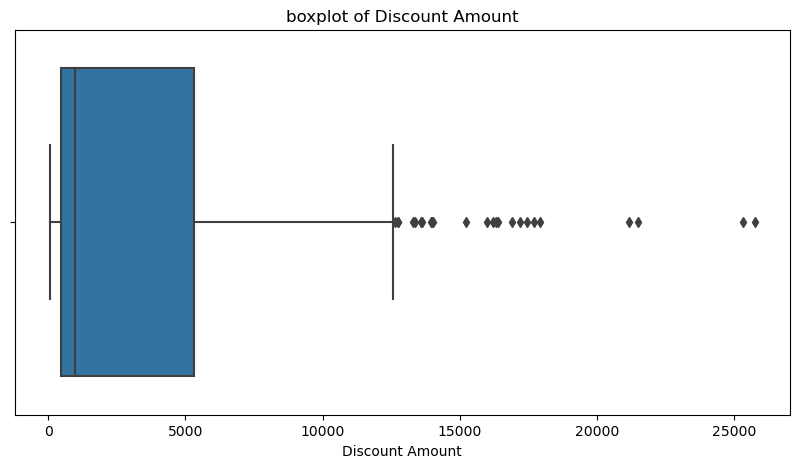

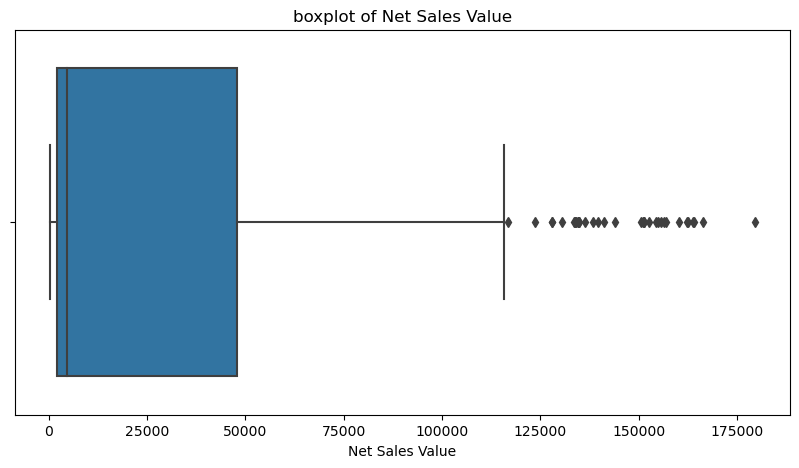

In [8]:
# Data Visualization using boxplot
def plot_boxplot(data,columns):
    for column in columns:
        plt.figure(figsize=(10,5))
        sns.boxplot(x= df[column])
        plt.title(f'boxplot of {column}')
        plt.show()
plot_boxplot(df,df_num)

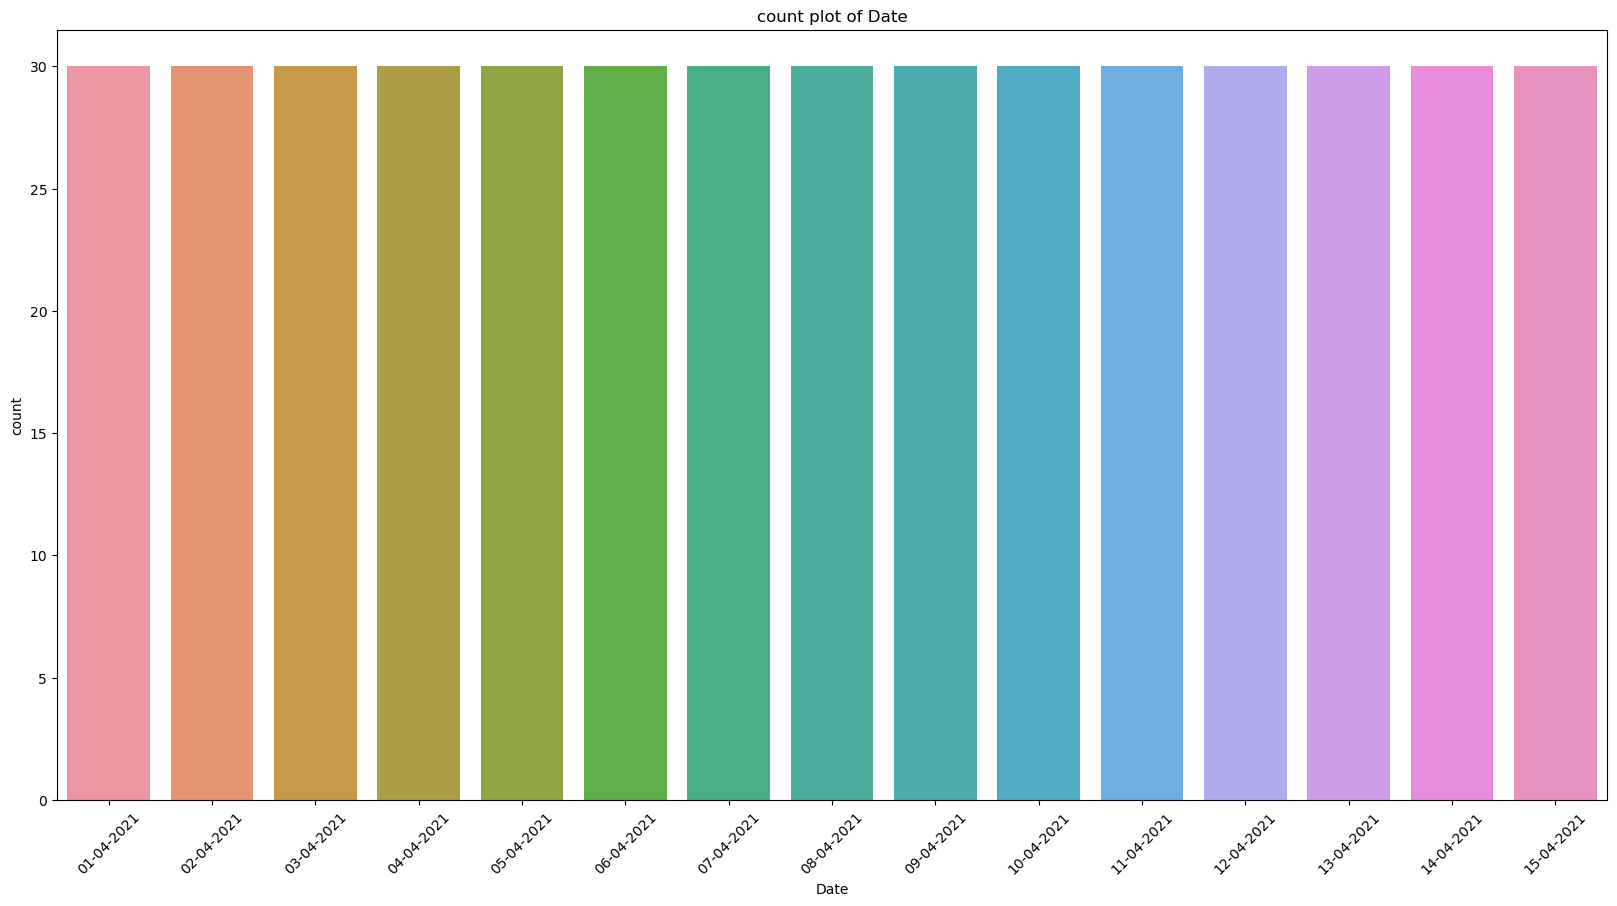

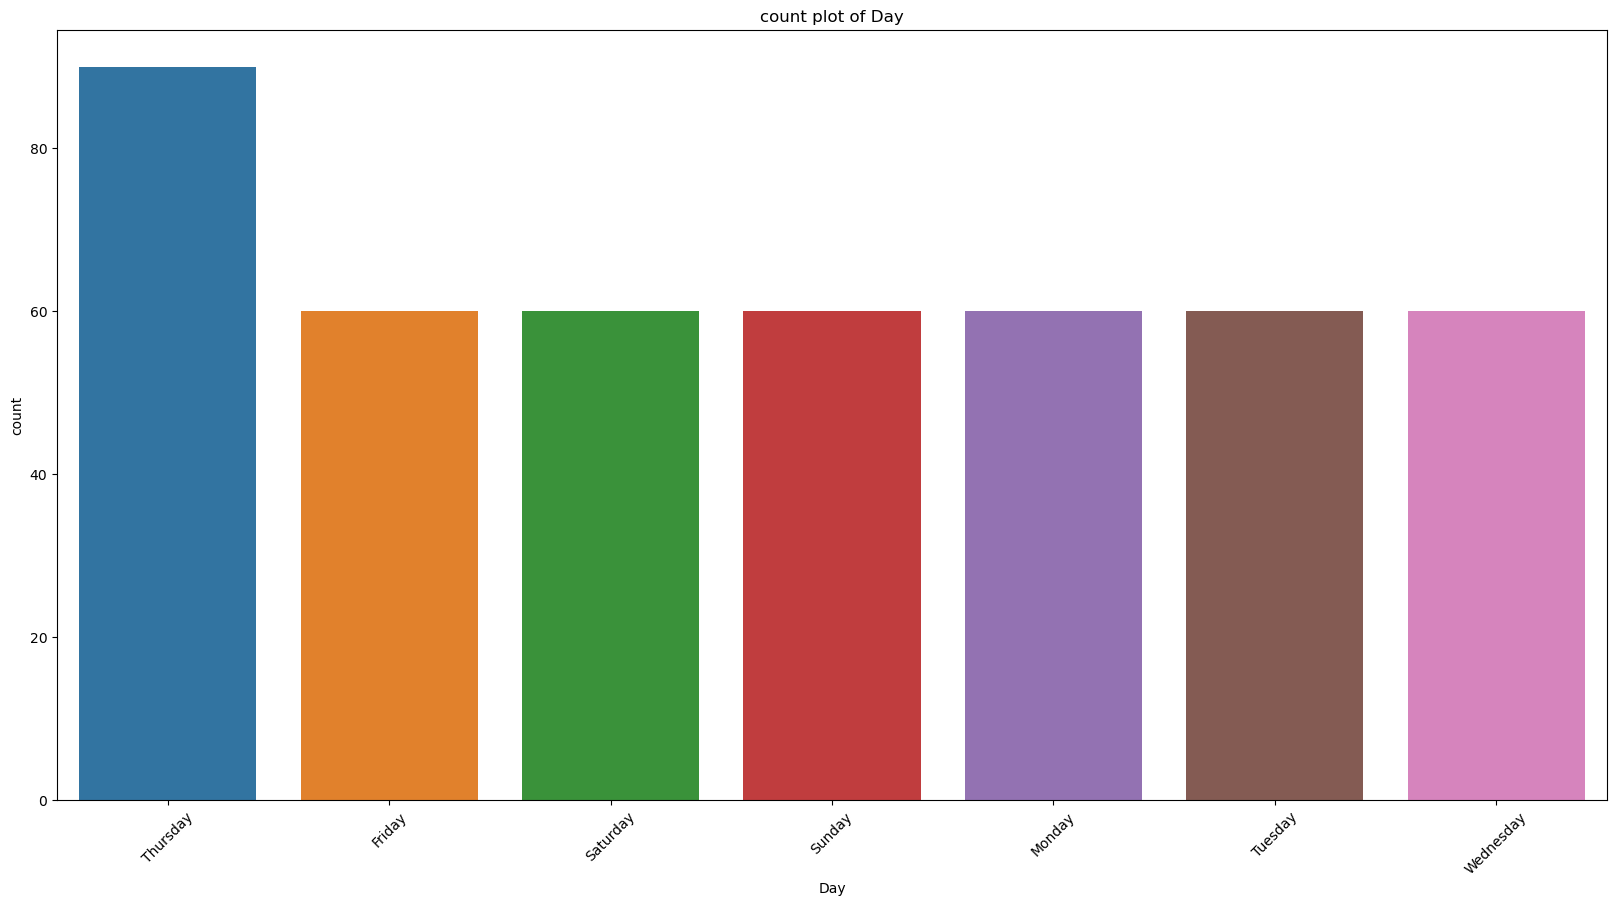

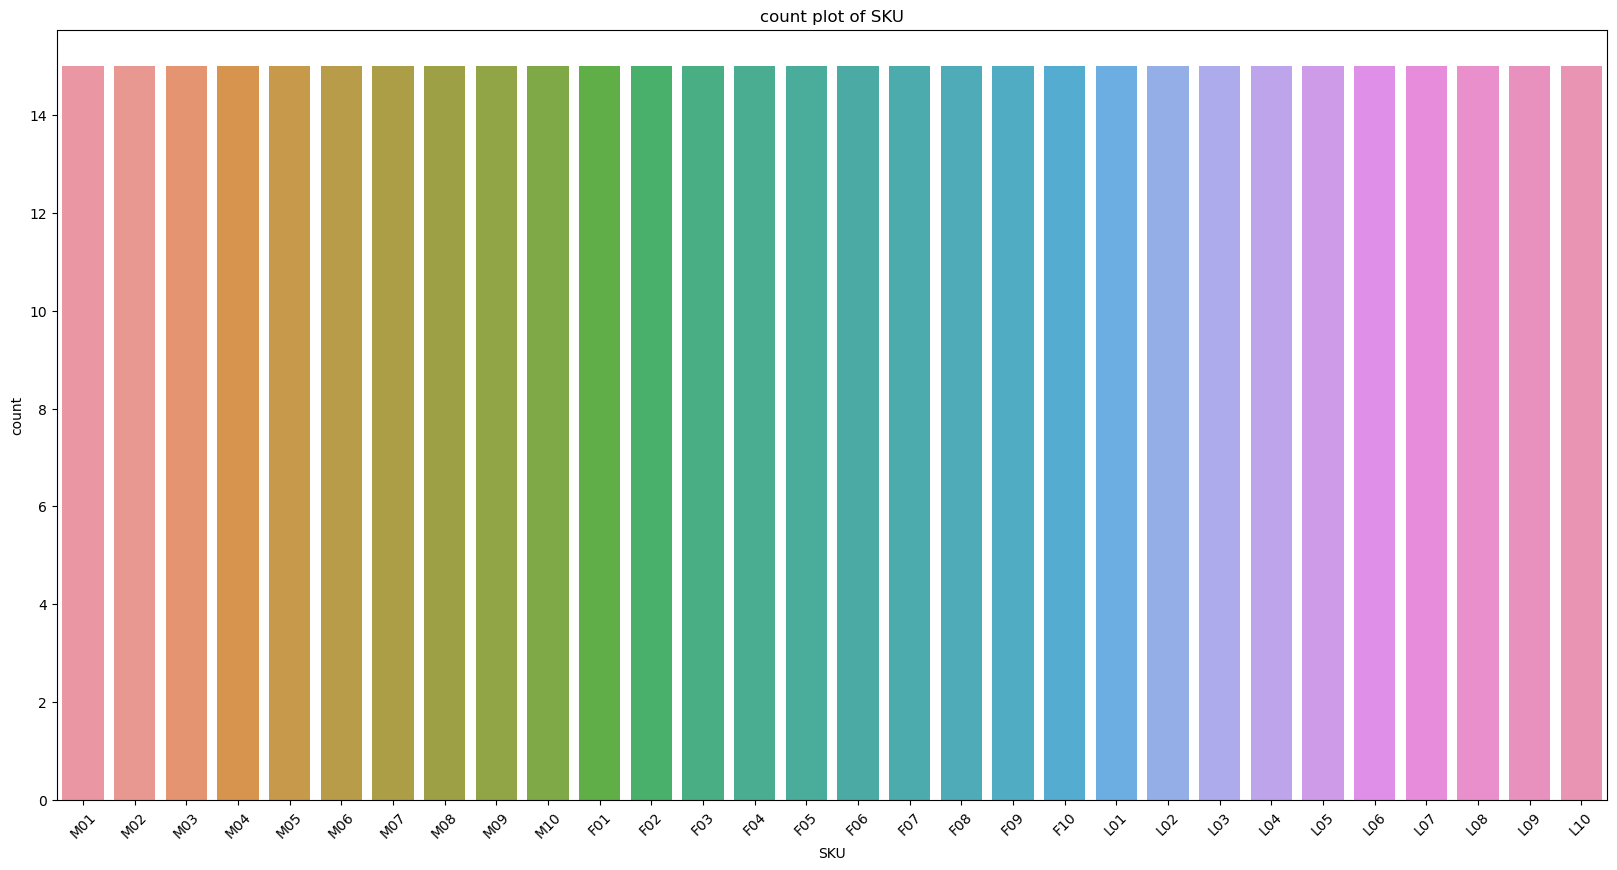

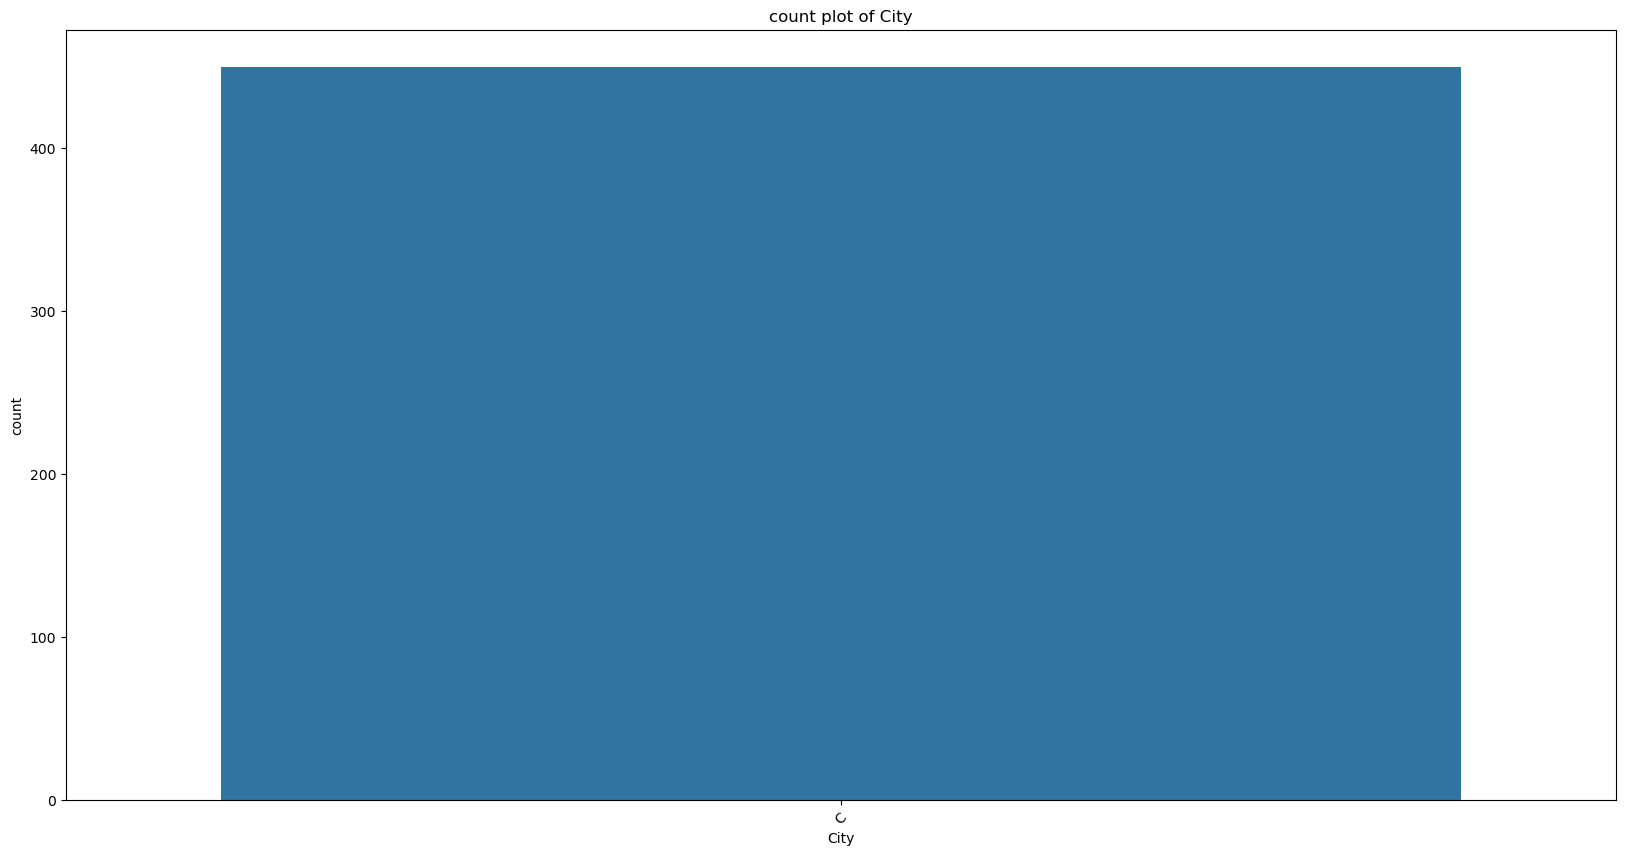

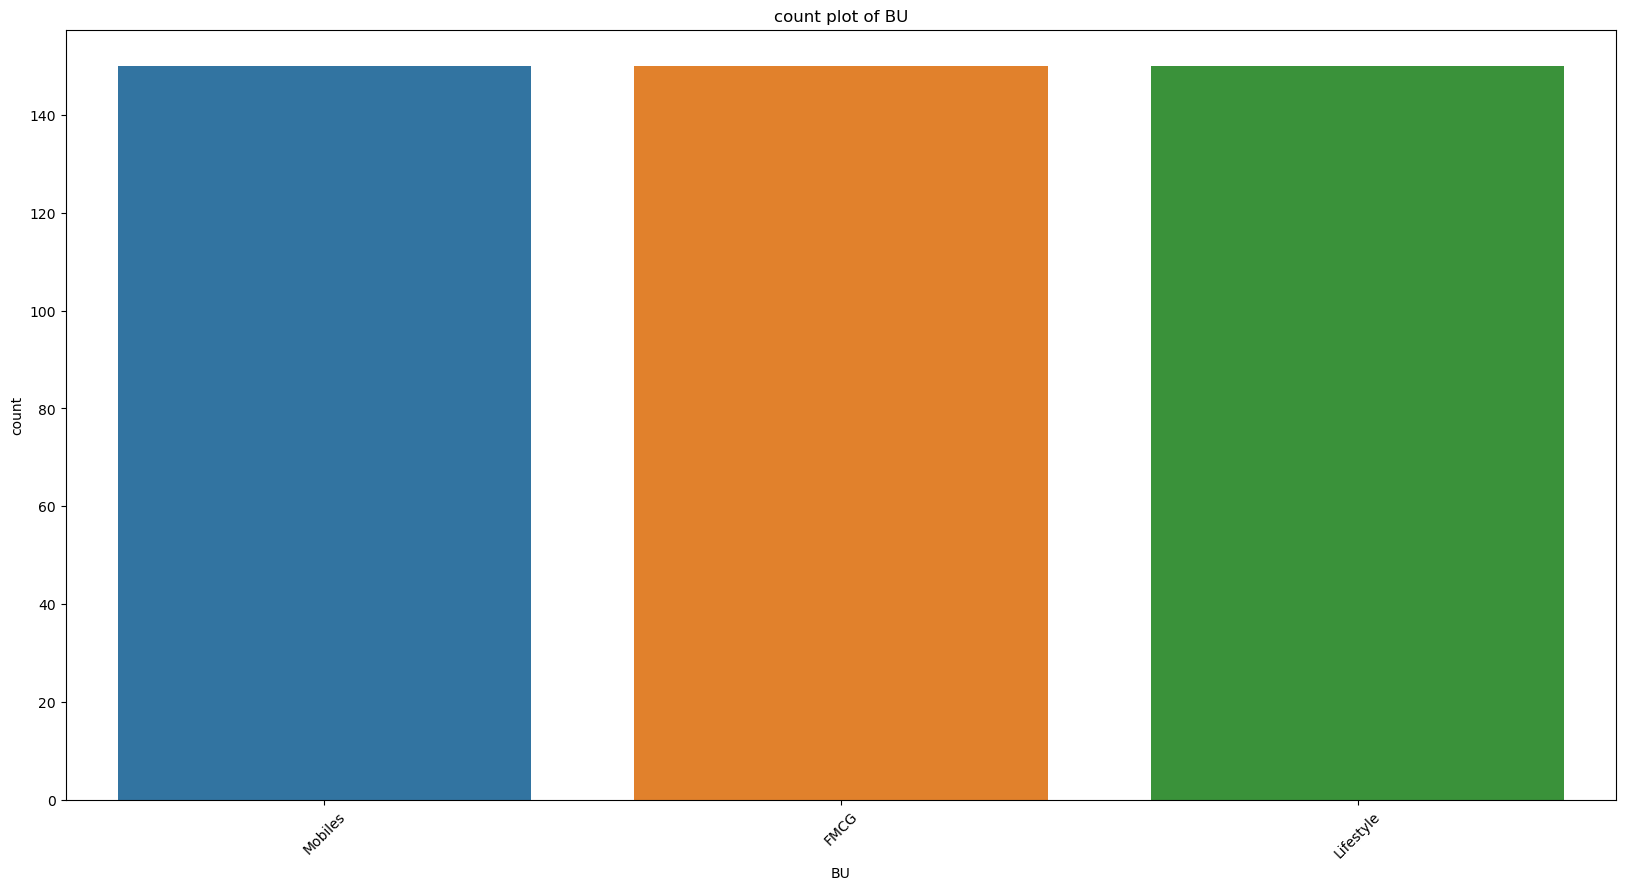

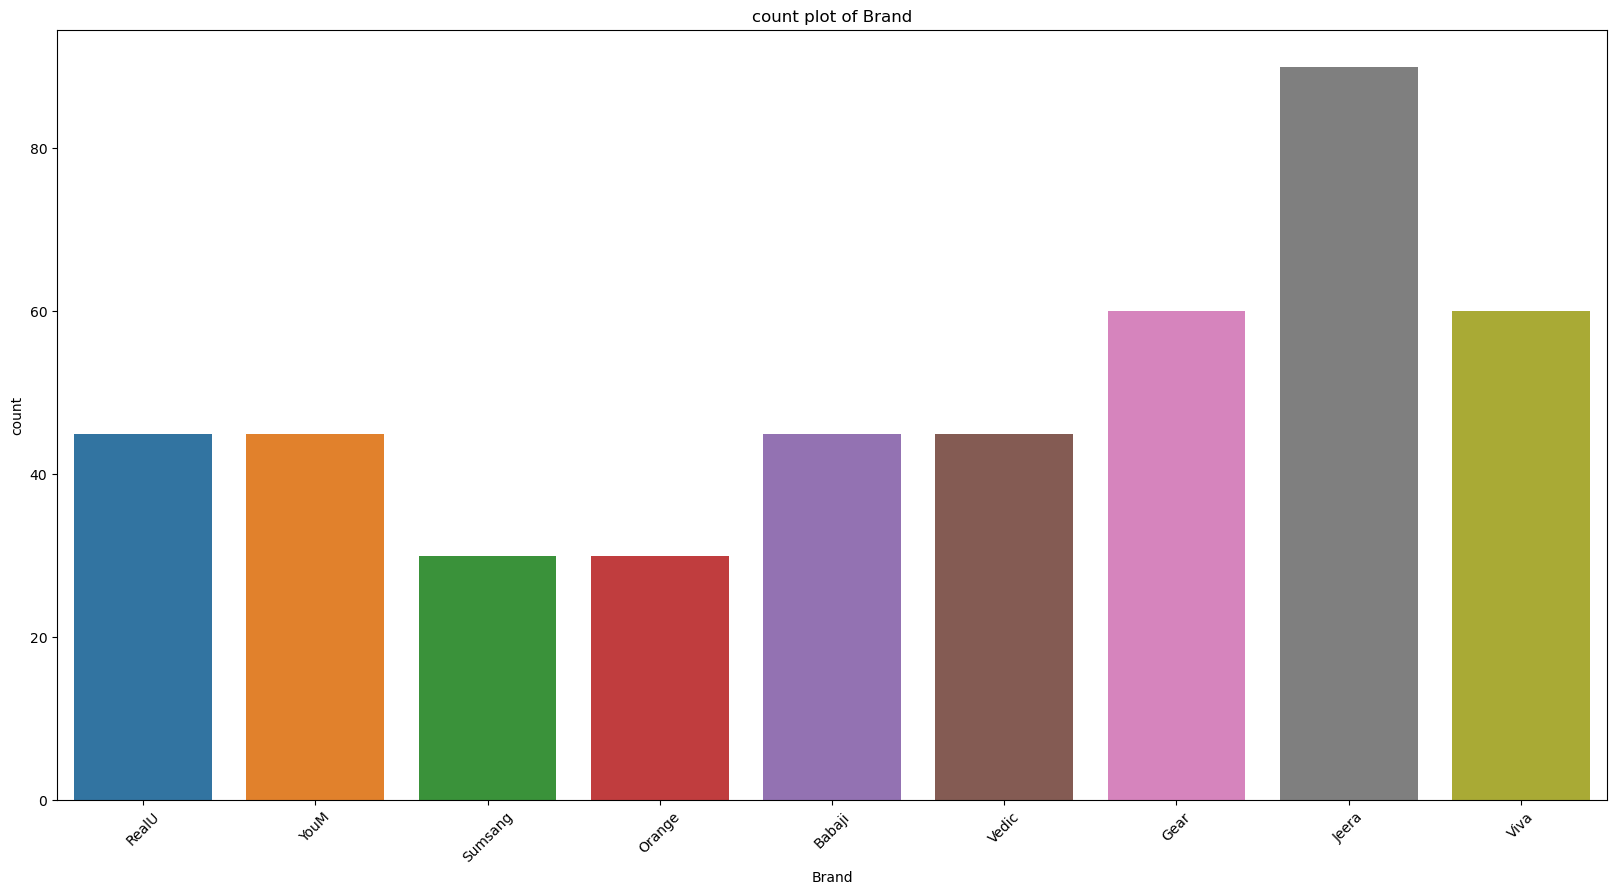

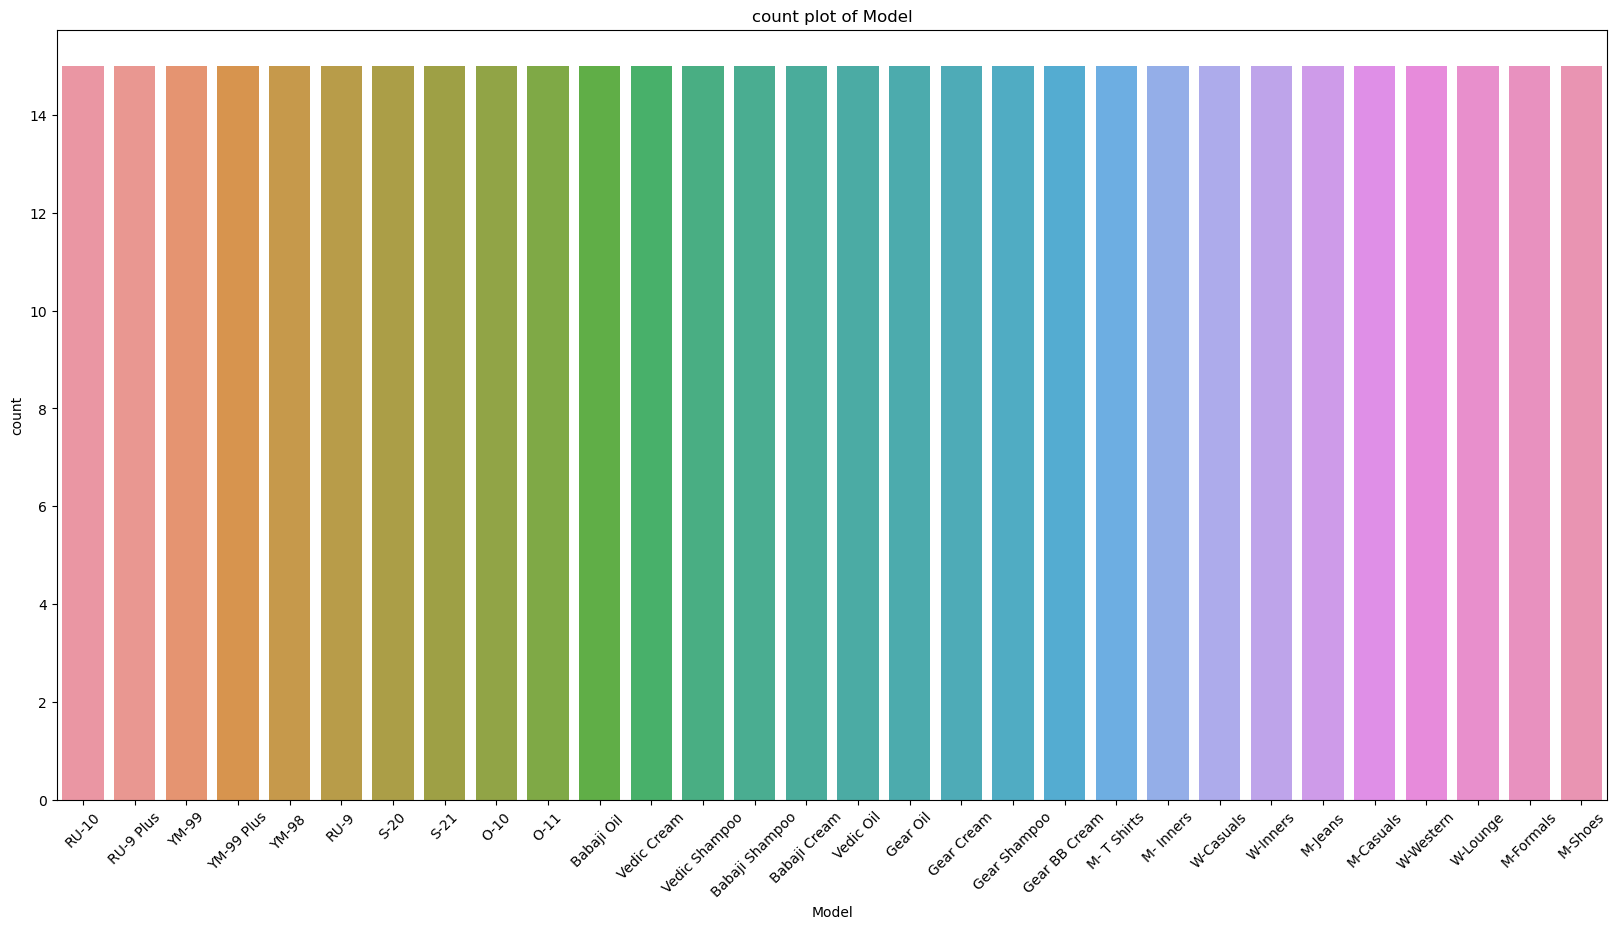

In [9]:
# bar charts visualisation for categorical columns

df_cat = df.select_dtypes(include='object').columns
def plot_count(data,columns):
    for column in columns:
        plt.figure(figsize =(20,10))
        sns.countplot(x=df[column])
        plt.title(f'count plot of {column}')
        plt.xticks(rotation = 45)
        plt.show()
plot_count(df,df_cat)

In [10]:
scaler = StandardScaler()

In [11]:
standardized_data = df.copy()

In [12]:
standardized_data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [13]:
# Standardization of Numerical Variables
standardized_data[df_num.columns] = scaler.fit_transform(df[df_num.columns])

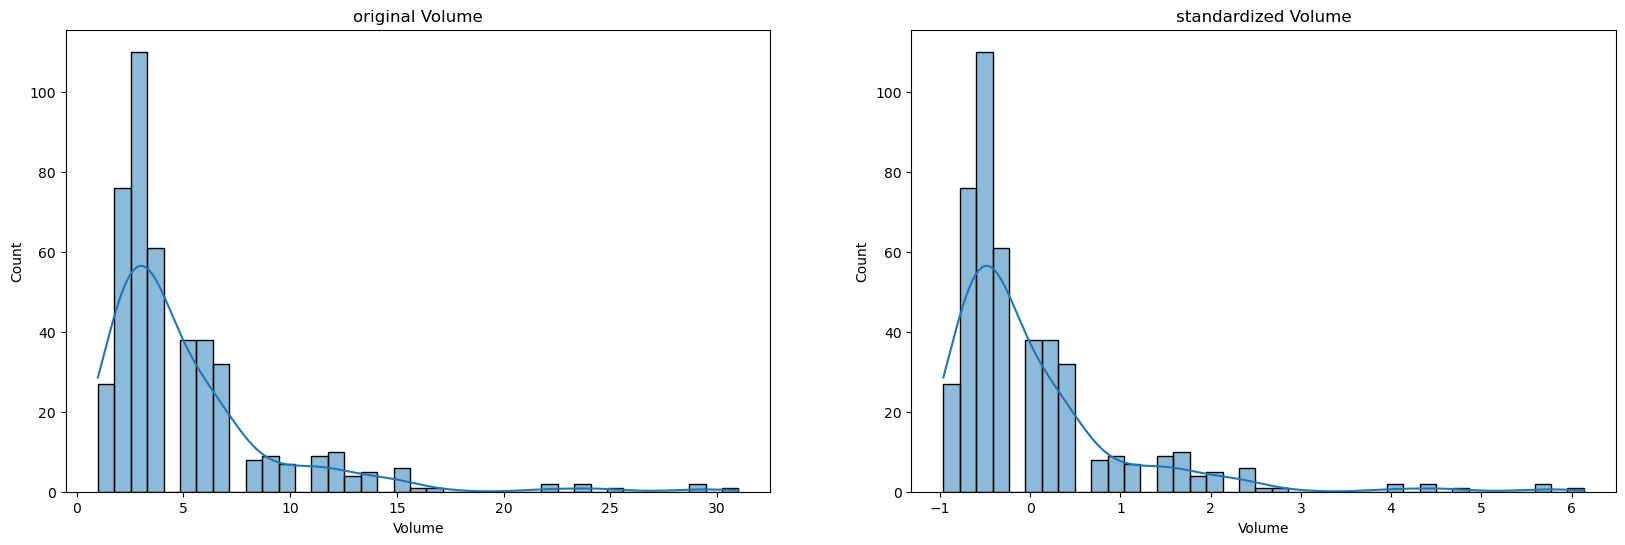

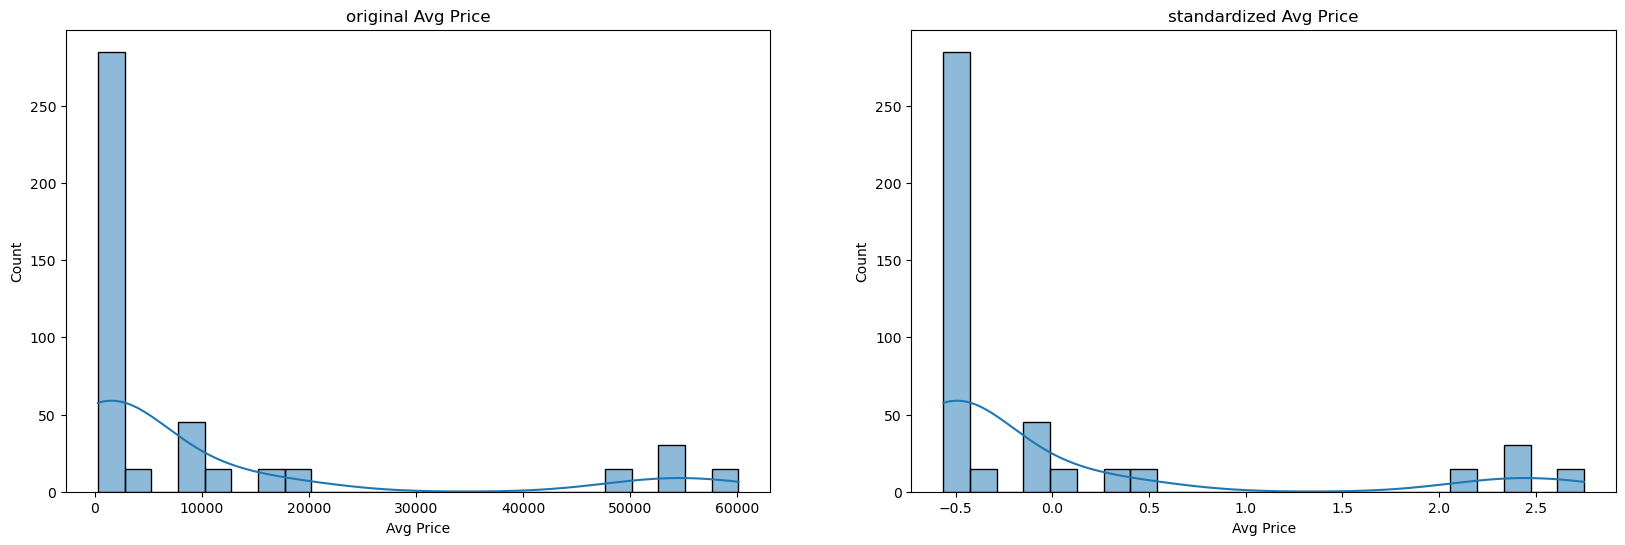

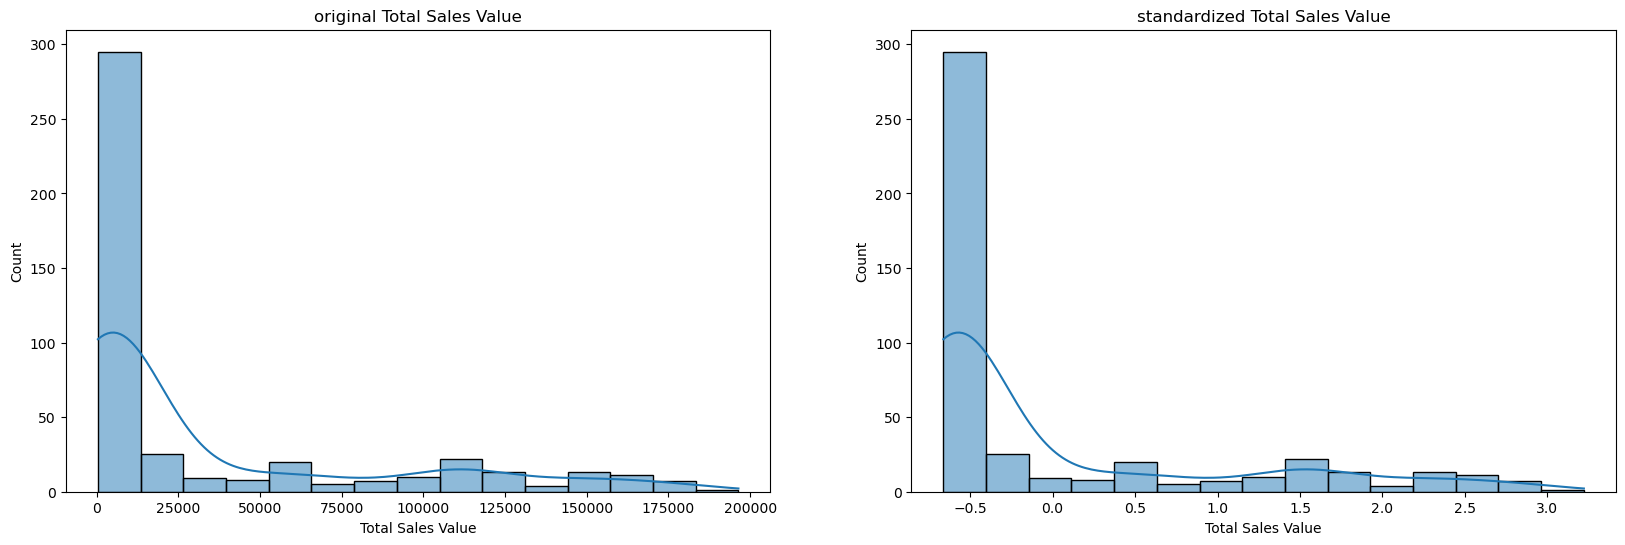

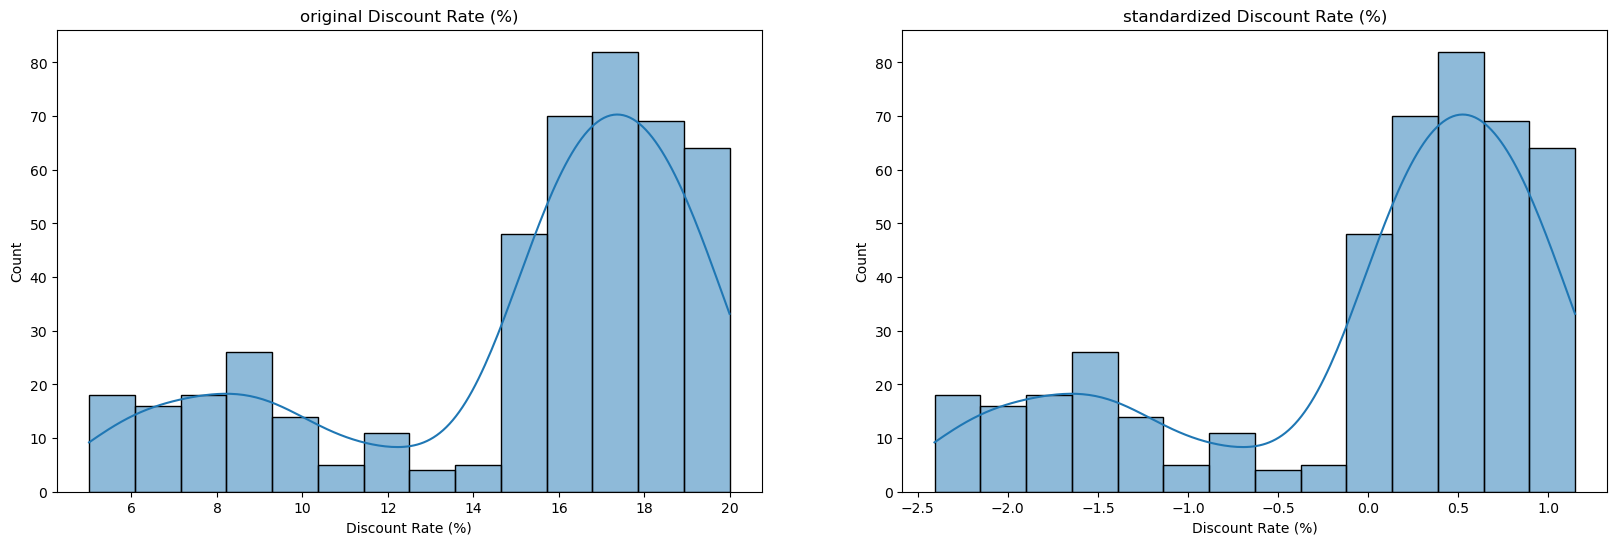

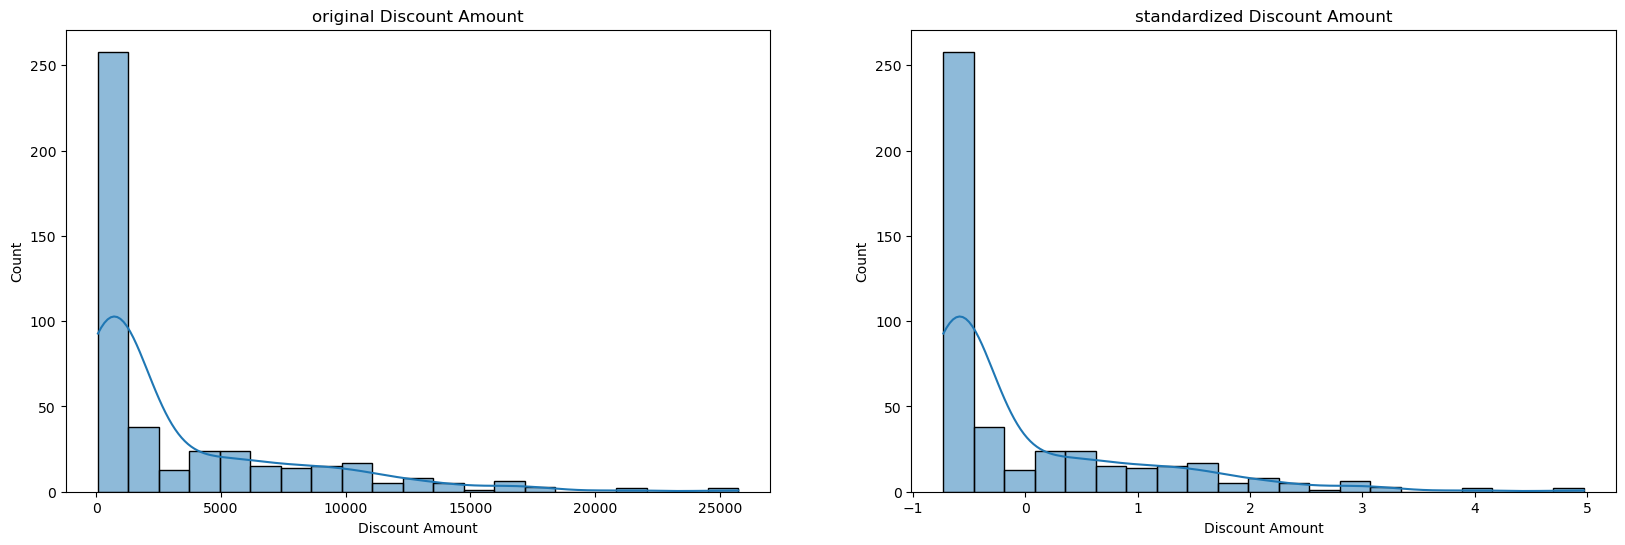

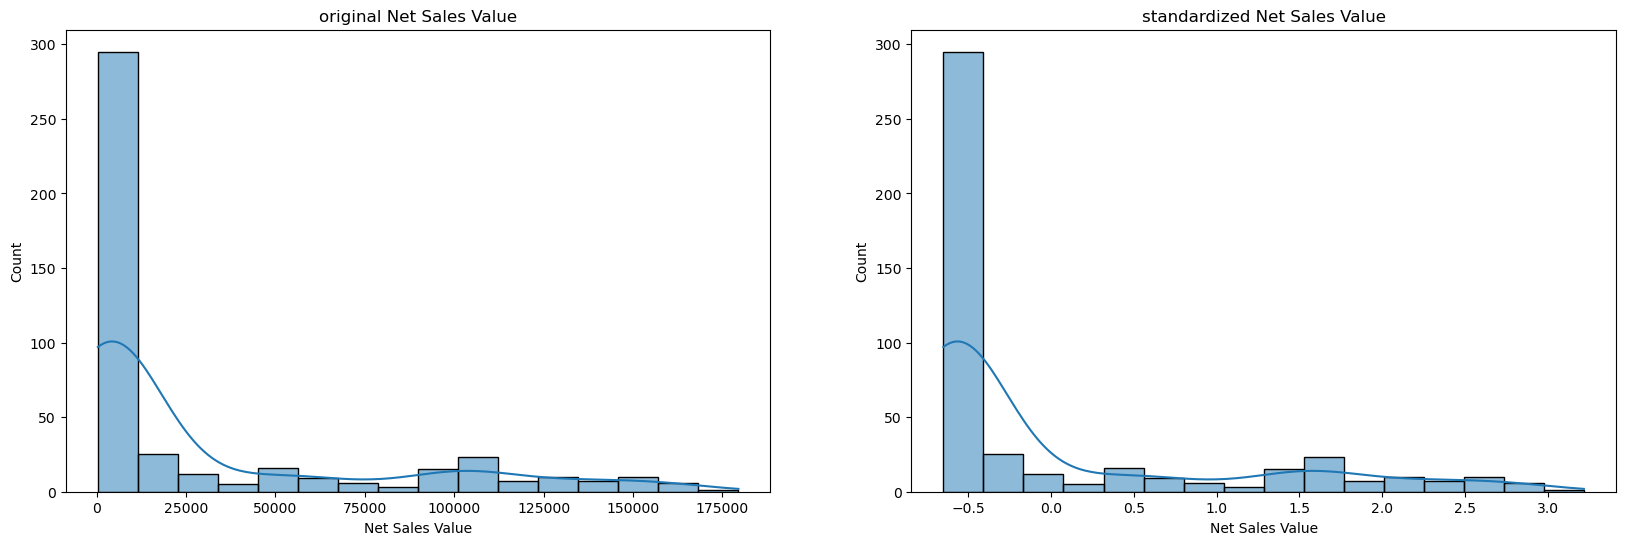

In [14]:
def compare_contributions (data,standardized_data,columns):
    for column in columns:
        plt.figure(figsize=(20,6))
        plt.subplot(1,2,1)
        sns.histplot(data[column],kde = True)
        plt.title(f'original {column}')
        plt.subplot(1,2,2)
        sns.histplot(standardized_data[column],kde = True)
        plt.title(f'standardized {column}')
        plt.show()
compare_contributions(df,standardized_data,df_num)

In [15]:
df_cat

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [16]:
# Conversion of Categorical Data into Dummy Variables
df_dummies= pd.get_dummies(df)

In [17]:
df_dummies.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11.560498,11676.102961,89323.897039,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9.456886,10657.910157,102042.089843,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6.935385,8364.074702,112235.925298,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17.995663,4372.946230,19927.053770,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# Summary of findings
summary ="""
key findings from the descriptive analytics and data visualizations.

- Descriptive statistics provided comprehensive insights into the central tendency, dispersion, and shape of the numerical data distribution.
- Histograms and box plots were effective in visualizing the distribution, identifying outliers, and comparing original versus standardized data.
- Count plots were utilized to understand the frequency distribution of categorical variables.
- Standardization (using StandardScaler) ensured numerical features had a consistent scale, contributing to more effective data analysis and machine learning model performance.
- One-hot encoding transformed categorical variables into a format suitable for machine learning algorithms.

Reflecting on the importance of these preprocessing steps:
- Standardization and normalization techniques are crucial for ensuring that numerical features contribute equally during the analysis and modeling processes.
- One-hot encoding avoids the pitfalls of ordinal relationships in categorical data, enhancing the model's predictive accuracy and interpretability
"""


In [19]:
print(summary)


key findings from the descriptive analytics and data visualizations.

- Descriptive statistics provided comprehensive insights into the central tendency, dispersion, and shape of the numerical data distribution.
- Histograms and box plots were effective in visualizing the distribution, identifying outliers, and comparing original versus standardized data.
- Count plots were utilized to understand the frequency distribution of categorical variables.
- Standardization (using StandardScaler) ensured numerical features had a consistent scale, contributing to more effective data analysis and machine learning model performance.
- One-hot encoding transformed categorical variables into a format suitable for machine learning algorithms.

Reflecting on the importance of these preprocessing steps:
- Standardization and normalization techniques are crucial for ensuring that numerical features contribute equally during the analysis and modeling processes.
- One-hot encoding avoids the pitfalls of